In [143]:
import numpy as np
import scipy as sp
import scipy.stats as spst
import matplotlib.pyplot as plt
import itertools

In [136]:
dist_continuous = [d for d in dir(spst) if
                 isinstance(getattr(spst, d), spst.rv_continuous)]

In [138]:
dist_continuous

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'frechet_l',
 'frechet_r',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwobign',
 'laplace',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'powernorm

In [4]:
dist_discrete = [d for d in dir(spst) if
                 isinstance(getattr(spst, d), spst.rv_discrete)]

In [5]:
dist_discrete

['bernoulli',
 'betabinom',
 'binom',
 'boltzmann',
 'dlaplace',
 'geom',
 'hypergeom',
 'logser',
 'nbinom',
 'planck',
 'poisson',
 'randint',
 'skellam',
 'yulesimon',
 'zipf']

In [33]:
spst.uniform.cdf([0, 1, 2, 3, 4, 5, 6], loc=1, scale=4)

array([0.  , 0.  , 0.25, 0.5 , 0.75, 1.  , 1.  ])

In [30]:
spst.norm.rvs(size=3, random_state=1234)

array([ 0.47143516, -1.19097569,  1.43270697])

# 1, compare random samples and theirs distributions

## discrete distributions

### Binomial

<BarContainer object of 6 artists>

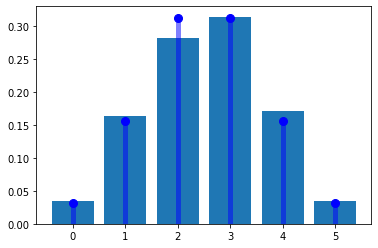

In [123]:
n = 5
p = 0.5
barWidth = 0.9
size = 1000
fig, ax = plt.subplots(1, 1)

binom = spst.binom.rvs(n=n, p=0.5, size=size, random_state=1234)
x = np.arange(spst.binom.ppf(0.01, n, p), spst.binom.ppf(1, n, p) + 1)
y_emp = np.arange(n + 1)
for i in range(n + 1):
    y_emp[i] = sum(binom == i)
ax.bar(x=x, height=y_emp/size)

# x = np.linspace(0, n, num = n + 1, endpoint=True)
y_m = spst.binom.pmf(x, n, p)
ax.plot(x, y_m, 'bo', ms=8)
ax.vlines(x, 0, y_m, colors='b', lw=5, alpha=0.5)

### Poisson

In [131]:
y_emp

array([360., 370., 188.,  61.,  16.,   4.,   1.])

In [132]:
x

array([0., 1., 2., 3.])

In [134]:
spst.poisson.ppf(0.9999, mu)

6.0

<BarContainer object of 6 artists>

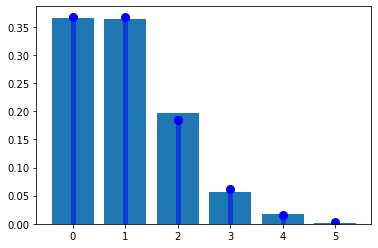

In [135]:
mu = 1
size = 1000

fig, ax = plt.subplots(1, 1)

poisson = spst.poisson.rvs(mu, size=size)

x = np.arange(0, max(spst.poisson.ppf(0.9999, mu), max(poisson)))
y_emp = np.zeros(max(poisson) + 1)
for i in range(max(poisson) + 1):
    y_emp[i] = sum(poisson == i)
ax.bar(x=x, height=y_emp/size)

ax.plot(x, spst.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, spst.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

## continuous distributions

## beta

(array([0.00373378, 0.01244593, 0.08712154, 0.21531466, 0.57251297,
        1.19232049, 1.96770219, 3.0056931 , 3.32555361, 2.06353589]),
 array([0.19572636, 0.27607388, 0.35642141, 0.43676893, 0.51711646,
        0.59746398, 0.6778115 , 0.75815903, 0.83850655, 0.91885408,
        0.9992016 ]),
 <a list of 10 Patch objects>)

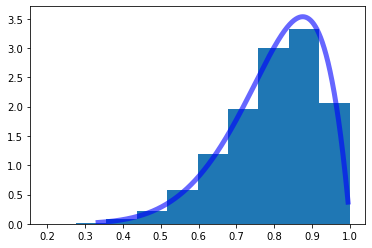

In [219]:
a, b, size = 8, 2, 10000
fig, ax = plt.subplots(1, 1)
x = np.linspace(spst.beta.ppf(0.001, a, b),
                spst.beta.ppf(0.999, a, b), size)
beta = spst.beta.rvs(a, b, size=size)
# d = 10
# y_emp = np.zeros(d)
# for i in range(d):
#     y_emp[i] = sum(((i/d) <= beta) & (beta<= ((i + 1)/d)))
# ax.bar(x=np.arange(0, 1, 0.1), height=10*y_emp/size)
ax.hist(beta, density=True)
ax.plot(x, spst.beta.pdf(x, a, b),
       'b-', lw=5, alpha=0.6, label='beta pdf')


## gamma

(array([0.27996463, 0.28321059, 0.1460685 , 0.06329635, 0.02109878,
        0.0097379 , 0.00568044, 0.00162298, 0.        , 0.00081149]),
 array([ 0.02021695,  1.25251549,  2.48481403,  3.71711257,  4.94941111,
         6.18170966,  7.4140082 ,  8.64630674,  9.87860528, 11.11090382,
        12.34320236]),
 <a list of 10 Patch objects>)

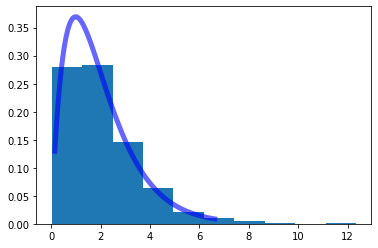

In [246]:

a = 1.99
size = 1000
fig, ax = plt.subplots(1, 1)
x = np.linspace(spst.gamma.ppf(0.01, a),
                spst.gamma.ppf(0.99, a), 100)
gamma = spst.gamma.rvs(a=a, size=size)
ax.hist(gamma,density=True)
ax.plot(x, spst.gamma.pdf(x, a),
       'b-', lw=5, alpha=0.6, label='gamma pdf')


## inverse gamma

(array([2.62862324, 1.35947697, 0.32067397, 0.1038803 , 0.05419842,
        0.0135496 , 0.02258267, 0.00451653, 0.00451653, 0.00451653]),
 array([0.07716013, 0.29856881, 0.51997749, 0.74138617, 0.96279485,
        1.18420352, 1.4056122 , 1.62702088, 1.84842956, 2.06983824,
        2.29124692]),
 <a list of 1 Patch objects>)

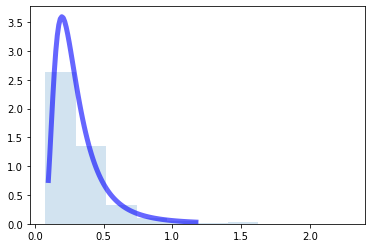

In [265]:
a = 4.07
size = 1000
fig, ax = plt.subplots(1, 1)

r = spst.invgamma.rvs(a, size=size)

x = np.linspace(spst.invgamma.ppf(0.01, a),
                spst.invgamma.ppf(0.99, a), 100)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.plot(x, spst.invgamma.pdf(x, a), 'b-', lw=5, alpha=0.6, label='invgamma pdf')

## exponential

(array([0.67929613, 0.39260774, 0.18500581, 0.07202516, 0.04095548,
        0.02259613, 0.00988581, 0.00423677, 0.00282452, 0.00282452]),
 array([1.07462446e-03, 7.09160506e-01, 1.41724639e+00, 2.12533227e+00,
        2.83341815e+00, 3.54150403e+00, 4.24958991e+00, 4.95767579e+00,
        5.66576167e+00, 6.37384756e+00, 7.08193344e+00]),
 <a list of 1 Patch objects>)

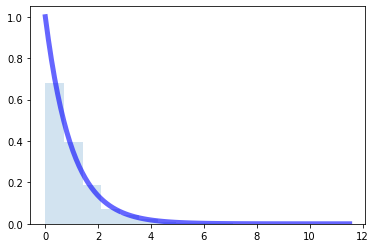

In [269]:
size = 1000

fig, ax = plt.subplots(1, 1)
x = np.linspace(spst.expon.ppf(0.00001),
                spst.expon.ppf(0.99999), 100)
expon = spst.expon.rvs(size=size)
ax.plot(x, spst.expon.pdf(x),
       'b-', lw=5, alpha=0.6, label='expon pdf')
ax.hist(expon, density=True, histtype='stepfilled', alpha=0.2)

## Gaussian

(array([0.07136549, 0.41391984, 1.12757473, 3.04016985, 3.76809785,
        3.63963997, 1.41303669, 0.58519701, 0.15700408, 0.05709239]),
 array([0.67448381, 0.74454569, 0.81460756, 0.88466944, 0.95473131,
        1.02479319, 1.09485506, 1.16491694, 1.23497881, 1.30504069,
        1.37510256]),
 <a list of 1 Patch objects>)

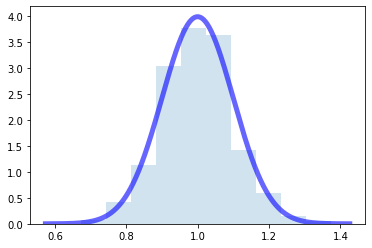

In [280]:
mu, s, size = 1, 0.1, 1000
fig, ax = plt.subplots(1, 1)
x = np.linspace(spst.norm.ppf(0.00001,loc=mu, scale=s),
                spst.norm.ppf(0.99999,loc=mu, scale=s), 1000)
ax.plot(x, spst.norm.pdf(x, loc=mu, scale=s),
       'b-', lw=5, alpha=0.6, label='norm pdf')
norm = spst.norm.rvs(size=size,loc=mu, scale=s)
ax.hist(norm, density=True, histtype='stepfilled', alpha=0.2)

# 2, Maximum likelihood estimation, Bayesian updating

## 2.1 Likelihood plot

In [474]:
def loglike(param, distrib, x):
    rv = distrib(*param)
    try:
        return np.sum(np.log(rv.pdf(x)))
    except AttributeError:
        return np.sum(np.log(rv.pmf(x)))
    
loglike((0, 1), spst.norm, np.array([-3,-2,-1,0,1,2,3]))
loglike((2, 0.5), spst.binom, np.array([1, 2, 0,2]))
loglike((1,), spst.gamma, np.array([0,1,2,3]))

-20.432569732432704

-4.852030263919617

-6.0

In [455]:
def plot_likelihood(distrib, data, a, b=None):
    if b is not None:
        X, Y = np.meshgrid(np.array(a).astype(float), np.array(b).astype(float))
        LH = np.array(X)
        for x in range(X.shape[0]):
            for y in  range(X.shape[1]):
                LH[x][y] = loglike((X[x][y], Y[x][y]), distrib, data)
        
        fig, ax = plt.subplots()
        CS = ax.contour(X, Y, LH)  
        ax.clabel(CS, inline=1, fontsize=10)     
    else:
        LH = np.zeros(len(a))
        for x in a:
            LH[x] = loglike((x), distrib, data)
        plt.plot(a, LH,
                 'b-', lw=5, alpha=0.6, label='norm pdf')
            

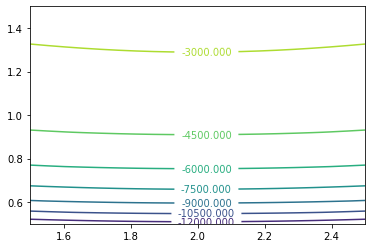

In [456]:
mu = 2
s = 1
x = np.linspace(spst.norm.ppf(0.00001,loc=mu, scale=s),
                spst.norm.ppf(0.99999,loc=mu, scale=s), 1000)
a = np.linspace(1.5, 2.5, 20)
b = np.linspace(0.5, 1.5, 20)
plot_likelihood(spst.norm, x, a, b)

Text(0.5, 1.0, 'Simplest default with labels')

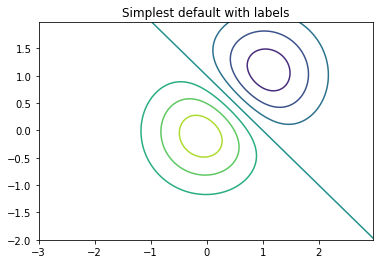

In [454]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
# ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')

## 2.2 Bayesian prior and Bayesian updating

the prior distribution influencing the inference on θ 

$X \sim B(n, \theta)$

$\pi_{\theta}(t|\alpha, \beta) = beta(t;\alpha, \beta)$

In [478]:
def L_Pr_Po(alph, beta, x, n):
    t = np.arange(0, 1, 0.01)
    likelihood = [loglike((100, i), spst.binom, x) for i in t]
    prior_function = spst.beta.pdf(t, alph, beta)
    post_function = spst.beta.pdf(t, x + alph, n - x + beta)

    fig, axs = plt.subplots(1, 3, sharex=True, tight_layout=True)
    axs[0].plot(t, likelihood)
    axs[1].plot(t, prior_function)
    axs[2].plot(t, post_function)

/Users/yunfei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


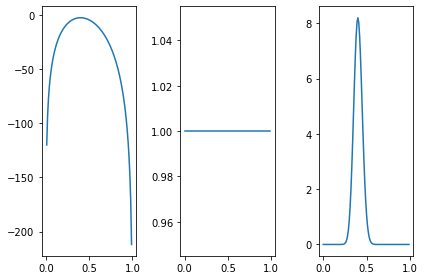

In [480]:
L_Pr_Po(alph = 1, beta = 1, x = 40, n = 100)

/Users/yunfei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


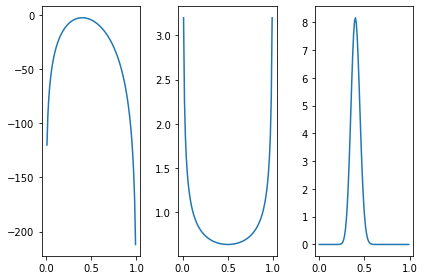

In [481]:
L_Pr_Po(alph = 0.5, beta = 0.5, x = 40, n = 100)

/Users/yunfei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


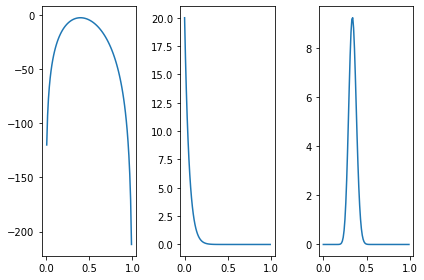

In [483]:
L_Pr_Po(alph = 1, beta = 20, x = 40, n = 100)

/Users/yunfei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


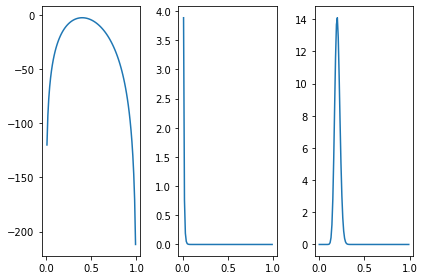

In [485]:
L_Pr_Po(alph = 0.1, beta = 100, x = 40, n = 100)